# < 25. Regularization > 

## 학습 목표
- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

## 목차
- 들어가며
- Regularization과 Normalization
- L1 Regularization
- L2 Regularization
- Extra : Lp norm
- Dropout
 -Batch Normalization

---

## 25.2 Regularization과 Normalization

### Regularization? Normalization?
<mark>Regularization : 정칙화</mark> 
- 오버피팅을 해결하기 위한 방법 중의 하나
- L1, L2 Regularization, Dropout, Batch normalization 등이 있습니다.
    - 오버피팅은 한국어로 과적합이라고 하며, train set은 매우 잘 맞히지만, validation/test set은 맞히지 못하는 현상을 말합니다.
- Regularization 기법들은 모델이 train set의 정답을 맞히지 못하도록 오버피팅을 방해(train loss가 증가) 하는 역할을 합니다.
- 그래서 train loss는 약간 증가하지만 결과적으로, validation loss나 최종적인 test loss를 감소시키려는 목적을 가지고 있지요.

<mark>Normalization : 정규화</mark> 
- 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정입니다. 
- 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당됩니다.
- 예를 들어, 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0~24) 의 값이 들어가는 경우, 학습 초반에는 데이터 거리 간의 측정이 피처 값의 범위 분포 특성에 의해 왜곡되어 학습에 방해를 받게 되는 문제가 있습니다. Normalization은 이를 모든 피처의 범위 분포를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정입니다.

> Regularization은 오버피팅을 막고자 하는 방법, Normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


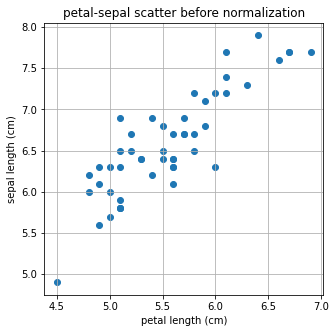

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

#### `minmax_scale` 이용해서  0-1로 normlization

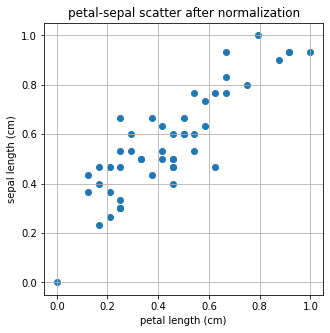

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

####  같은 데이터로 간단한 회귀 문제를 풀면서 Regularization에 대해 알아보겠습니다.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


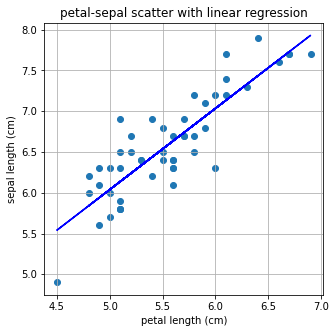

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

<mark> L1, L2 Regularization</mark>
- 이는 Lasso, Ridge라고 부릅니다.

기울기 : 0.00, 절편 : 6.59


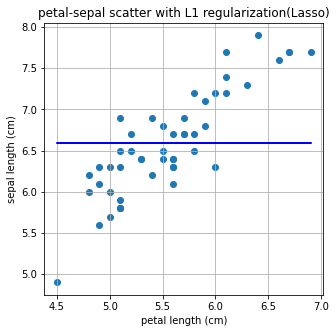

In [7]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

- 기울기가 0으로 나오는걸 알 수 있는데 Lasso 방법을 제대로 문제를 풀어내지 못하는 것 같다

기울기 : 0.93, 절편 : 1.41


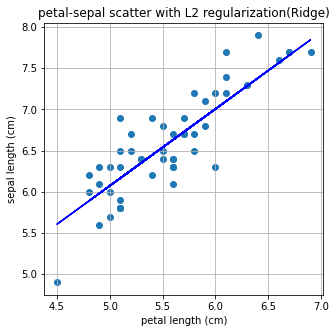

In [8]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

다시 다루겠지만, Linear Regression이 L2 Norm과 관련이 있습니다. 그래서 L2 Regularization을 쓰는 Ridge방법으로는 앞서 Linear Regression과 큰 차이가 없는 결과가 나옵니다.

그러나 왜 L1 Regularization을 쓰는 Lasso에서는 답이 나오지 않았을까요?

다음 스텝에서 그 이유를 알아보도록 하겠습니다!

---

## 25.3 L1 Regularization

### L1 regularization (Lasso)의 정의

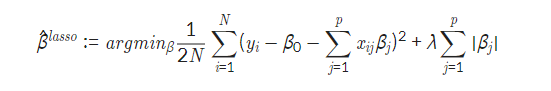

- 여기서 중요한 부분은 뒷부분! 이 부분이 없다면 Linear Regression과 동일합니다
- L1 norm
- 사이킷런이나 케라스, 텐서플로우 등의 패키지에서는 `Lasso` 라는 이름을 더 자주 사용합니다.

In [9]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


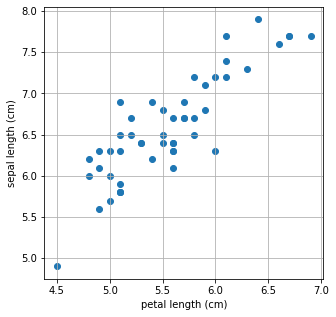

In [10]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


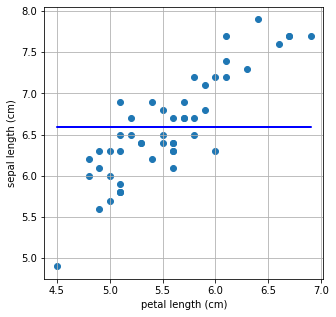

In [11]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### 이전 스텝에서 왜 L1 Regularization 만 답이 나오지 않았을까요?


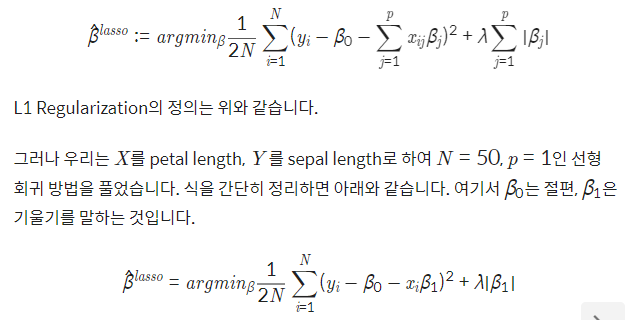

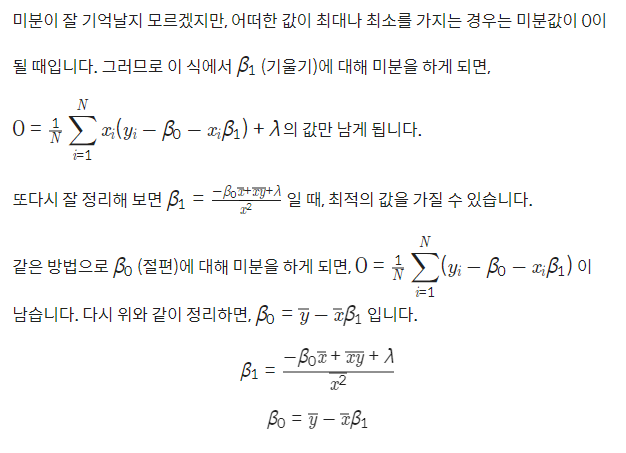

p = 1인 경우 $\beta _{0}$에 대해 미분하는 과정에서 $\lambda$가 사라지므로 Regularization의 효과를 볼 수 없습니다. X가 1차원 값인 선형회귀분석 같은 경우네는 L1 Regularization이 의미가 없다는 것을 말합니다. 그러므로, L1 Regularization을 사용할 때는 X가 2차원 이상인 여러 컬럼 값이 있는 데이터일 때 실제 효과를 볼 수 있습니다

### 컬럼 수가 많은 데이터에서의 L1 regularization 비교

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [13]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


먼저 Linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력해 보겠습니다.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


#### L1 regularization으로

In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


### 결과 분석
- coefficient 부분을 보시면 Linear Regression과 L1 Regularization의 차이가 좀 더 두드러짐을 알 수 있습니다. Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다. Error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다. 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다. 다만 Linear Regression과 L1, L2 Regularization의 차이 중 하나는 $\alpha$ 라는 하이퍼파라미터(수식에서는 $\lambda$)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.

---

## 25.4 L2 Regularization

### L2 Regularization(Ridge) 의 정의

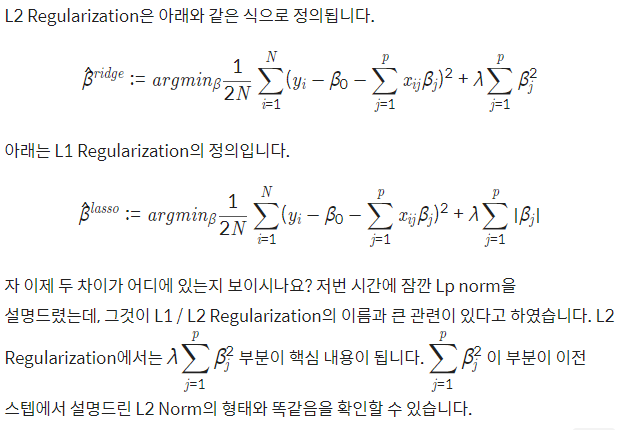

### L1/L2 Regularization의 차이점

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-46-1.max-800x600.png)

In [18]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


#### L1 regularization으로 iteration 횟수를 5회로 두고

In [19]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


#### L2 regularization도 같은 제약조건을 두고

In [20]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


iteration 값을 5로만 설정해 보아도, L2 Regularization의 문제는 Linear Regression과 같은 값이 나오지만, L1 Regularization에서는 앞 step과 같은 값을 확인할 수는 없었습니다. 심지어 수렴하지 않았다는 경고까지 나오는군요! 이는 아직 다른 조건들을 만족하는 답을 찾지 못하였다는 뜻입니다.

정리하면, L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징이며, L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 수렴 속도가 빠르다는 장점이 있습니다. 

---

## 25.5 Extra : Lp norm

### vector norm

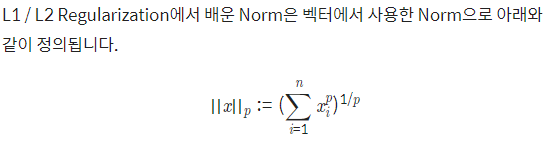

In [21]:
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [22]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


### matrix norm

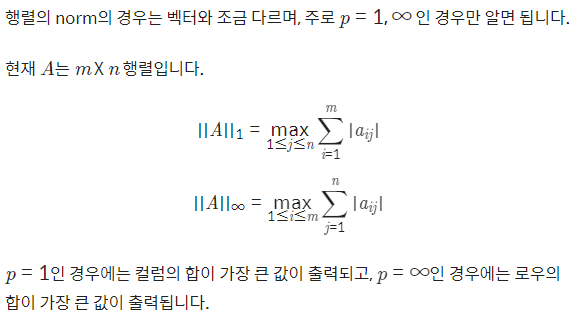

In [23]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


---

## 25.6 Dropout

- 드롭아웃 기법이 나오기 전의 신경망은 fully connected architecture로 모든 뉴런들이 연결되어 있었습니다. 그러나 드롭아웃이 나오면서 확률적으로 랜덤하게 몇 가지의 뉴럴만 선택하여 정보를 전달하는 과정입니다. 이름 그대로 몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌 확률적으로 버리면서 전달하는 기법입니다. 드롭아웃은 오버피팅을 막는 Regularization layer 중 하나입니다. 확률을 너무 높이면, 제대로 전달되지 않으므로 학습이 잘되지 않고, 확률을 너무 낮추는 경우는 fully connected layer와 같습니다. fully connected layer에서 오버피팅이 생기는 경우에 주로 Dropout layer를 추가합니다.

### 실습(not overfitting)
- 드롭아웃 레이어를 중간에 추가하여 확률을 1에 가깝게 주면 어떻게 되는지 살펴보도록 하겠습니다.

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [25]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


#### dropout의 확률을 0.9로 주었을 때

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 1.4307 - accuracy: 0.4386
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2164 - accuracy: 0.5025
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1892 - accuracy: 0.5157
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1596 - accuracy: 0.5262
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1394 - accuracy: 0.5391


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5048 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8925


현재 이 데이터 셋은 학습이 잘 되는 데이터 셋으로, fully connected layer에서도 결과가 잘 나옴을 확인할 수 있는데요. 일부러 중간에 Dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인하였습니다. 다음은 overfitting이 나는 환경에서의 Dropout의 중요성을 알아보도록 하겠습니다.

### 실습(overfitting)
- overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다. 우리는 위의 데이터를 이제 train:valid=99:1로 split 한 뒤에 loss function의 값을 그려보고, overfitting 이 나는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였습니다.

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.0514 - accuracy: 0.5442 - val_loss: 1.6421 - val_accuracy: 0.5917
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4034 - accuracy: 0.6098 - val_loss: 1.1806 - val_accuracy: 0.6300
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0775 - accuracy: 0.6712 - val_loss: 0.9551 - val_accuracy: 0.7217
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8985 - accuracy: 0.7175 - val_loss: 0.8224 - val_accuracy: 0.7483
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.7356 - val_loss: 0.7387 - val_accuracy: 0.7633
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7265 - accuracy: 0.7474 - val_loss: 0.6879 - val_accuracy: 0.7750
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.7574 - val_loss: 0.6527 - val_accuracy: 0.7883

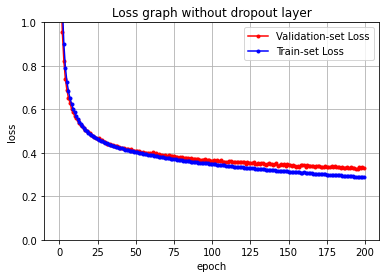

In [29]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

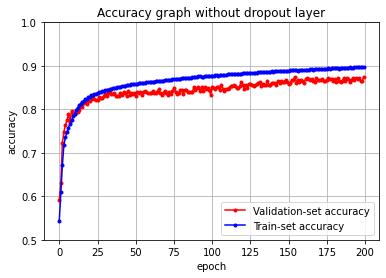

In [30]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위의 droupout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌습니다. 그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.
이렇게 오버피팅을 만든 환경에서 Dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠습니다.



In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 6ms/step - loss: 2.0656 - accuracy: 0.4742 - val_loss: 1.6726 - val_accuracy: 0.5550
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4530 - accuracy: 0.5606 - val_loss: 1.2162 - val_accuracy: 0.6550
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1542 - accuracy: 0.6255 - val_loss: 1.0075 - val_accuracy: 0.7067
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9882 - accuracy: 0.6718 - val_loss: 0.8709 - val_accuracy: 0.7417
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8815 - accuracy: 0.6991 - val_loss: 0.7836 - val_accuracy: 0.7633
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.7160 - val_loss: 0.7293 - val_accuracy: 0.7650
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.7305 - val_loss: 0.6892 - val_accuracy: 0.7683

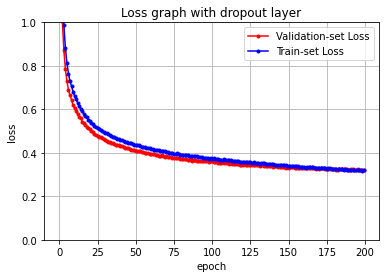

In [32]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

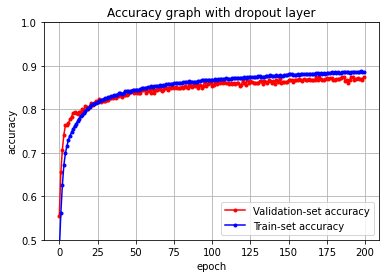

In [33]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만, Dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다. 사실 더 복잡한 네트워크나, 더 어려운 데이터의 경우에는 이러한 오버피팅이 더 자주 있는 일이므로, Dropout layer를 추가하는 경우가 많습니다. 하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일입니다.

---

## 25.7  Batch Normalization

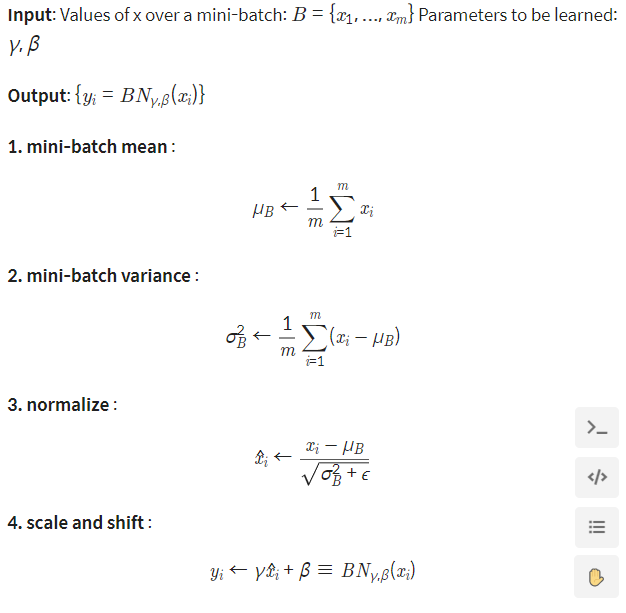

- 수식에서 중요한 부분은 normalize 부분에서 분모에 $\epsilon$이 추가되었다는 점인데요. 이 부분으로 인해 normalize 과정에서 gradient가 사라지거나(vanishing), 폭등하는(explode) 것을 막을 수 있습니다. ϵ 부분만 제외하면, 기존의 z-score로 normalize하는 과정과 같지만, 이 부분을 추가하는 것만으로도 오버피팅이나 학습이 잘되지 않는 것을 막을 수 있게 됩니다. 

### 실습
- 아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교하고자 합니다. 중점적으로 봐야 할 내용은 정확도 비교와 속도의 차이입니다.

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [35]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 17ms/step - loss: 1.3202 - accuracy: 0.5847 - val_loss: 0.7799 - val_accuracy: 0.7345
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.7699 - val_loss: 0.6191 - val_accuracy: 0.7938
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5768 - accuracy: 0.8065 - val_loss: 0.5511 - val_accuracy: 0.8169
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5247 - accuracy: 0.8245 - val_loss: 0.5177 - val_accuracy: 0.8251
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4944 - accuracy: 0.8340 - val_loss: 0.4905 - val_accuracy: 0.8341
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 0.8426 - val_loss: 0.4718 - val_accuracy: 0.8385
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4513 - accuracy: 0.8484 - val_loss: 0.4571 - val_accuracy: 0.8436
Epoch 8/20
21/21 [=

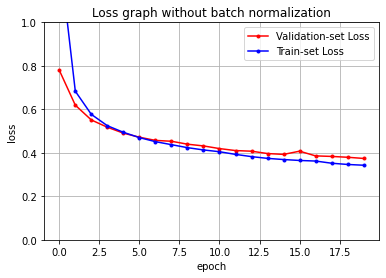

In [37]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

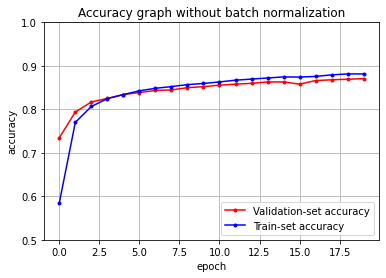

In [38]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### BatchNoramlization layer를 추가

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 18ms/step - loss: 0.9292 - accuracy: 0.6851 - val_loss: 1.1100 - val_accuracy: 0.6256
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5137 - accuracy: 0.8248 - val_loss: 0.8715 - val_accuracy: 0.7336
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4485 - accuracy: 0.8449 - val_loss: 0.7612 - val_accuracy: 0.7820
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8562 - val_loss: 0.6761 - val_accuracy: 0.8222
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3843 - accuracy: 0.8639 - val_loss: 0.6213 - val_accuracy: 0.8383
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3617 - accuracy: 0.8729 - val_loss: 0.5748 - val_accuracy: 0.8486
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3472 - accuracy: 0.8775 - val_loss: 0.5485 - val_accuracy: 0.8437
Epoch 8/20
21/21 [=

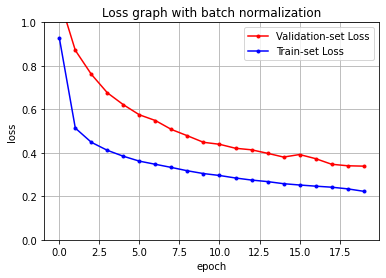

In [40]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

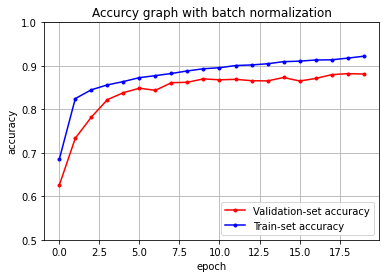

In [41]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

기존의 fully connected layer도 낮지 않은 결과를 가져오지만, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있습니다. 또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있었습니다. 즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 앞서 설명해 드린 \epsilonϵ 부분으로 인해 안정적인 학습이 가능해집니다.